# Imports

In [41]:
import numpy    as np
import pandas   as pd

from sklearn    import cluster  as c
from sklearn    import metrics  as mt
from matplotlib import pyplot   as plt


# Load Dataset

In [34]:
#Lendo arquivo CSV
x = pd.read_csv('../../dataset/cluster/X_dataset.csv')

In [35]:
x.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,0.191700,0.232053,-1.169593,1.913905,0.627586,0.573840,-0.659563,1.224884,0.251717,0.455285,0.970696,0.561341
1,0.246290,0.205534,-0.827996,-2.490847,0.018145,0.575862,0.510549,-0.820719,-0.544721,-0.293321,0.463415,0.780220,0.550642
2,0.196879,0.320158,1.109334,-0.268738,0.088358,0.627586,0.611814,-0.498407,2.135968,0.269020,0.447154,0.695971,0.646933
3,1.691550,0.239130,0.487926,-0.809251,0.930918,0.989655,0.664557,-0.981875,1.032155,1.186068,0.308943,0.798535,0.857347
4,0.295700,0.365613,1.840403,0.451946,1.281985,0.627586,0.495781,0.226796,0.401404,-0.319276,0.455285,0.608059,0.325963


# Model Training - AffinityPropagation

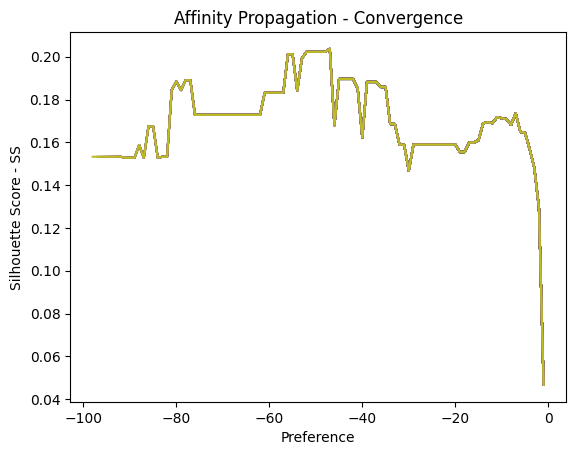

In [42]:
p=np.arange(-1,-100,-1)
ss_list=[]

for i in range(len(p)):
    #define
    model = c.AffinityPropagation(preference=p[i])

    #fit
    model.fit(x)
    labels = model.predict(x)

    #performance
    ss=mt.silhouette_score(x,labels)
    ss_list.append(ss)
    
    #plot 
    plt.plot ( p[:i] , ss_list[:i])
    plt.title( 'Affinity Propagation - Convergence' )
    plt.xlabel ('Preference')
    plt.ylabel ('Silhouette Score - SS')

# Final Clustering

In [52]:
#Localizando melhor valor de Silhoutte Score
ss_max = max(ss_list)

#Treinando modelo com o numero de preference que maxima o Silhoutte Score
max_index = ss_list.index( max( ss_list ) )

af = c.AffinityPropagation( preference=p[max_index] )
af.fit(x)

#Localizando numero de clusters gerados
clusters=len(af.cluster_centers_indices_)

print(
f'''Silhouette Score: {ss_max:.3f}
Clusters: {clusters}''')


Silhouette Score: 0.204
Clusters: 7
